### Problem Statement
A company XYZ has shared its Diwali Sales Data (Diwali is a major Indian festival). The company wants an analysis of its data followed by a summary consisting of sales insights. The company will then use the insights to improvise customer experience, and improve sales revenue.

#### Steps
##### 1. Data Cleaning
    Null Values
	Duplicate Values
	Column renaming 
##### 2. Exploratory Data Analysis
    Gender
	Age
	States of Country
	Marital status
	Occupation
	Product Category
##### 3. Conclusion with Insights
    Based on the analysis, any important insights will be mentioned here
    
#### Project Learning Outcomes
	1. Performed data cleaning and manipulation on a dataset containing over 11,000 records
	2. Performed EDA using pandas, matplotlib and seaborn libraries
	3. Improved customer experience by identifying potential customers across different states, occupation, gender and age groups
	4. Improved sales by identifying highest selling product categories and products, aiding business stakeholders to plan inventory for future demand.
	

### Importing Essential Libraries

In [1]:
import pandas as pd               # Handle dataframes
import numpy as np                # Array manipulation
import matplotlib.pyplot as plt   # Visualization
import seaborn as sns             # Visualization
%matplotlib inline                
                                  # Get visualizations as part of output, not as separate pop ups

### Loading Dataset

In [2]:
raw_df = pd.read_csv(r'Diwali Sales Data.csv', encoding= ('iso-8859-1'))
raw_df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [3]:
# There are 11251 rows and 15 columns in the raw dataframe
raw_df.shape

(11251, 15)

### Data Cleaning

In [4]:
# Basic statistics of numeric columns
raw_df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


Clearly, the mean age is about 35 years with Standard Deviation of about 13. So, 66% of all ages are likely between 22 and 48 years of age. Further, for obvious reasons, the Amount data is more fluctuating with very high Standard Deviation.

Further, no records contain negative values which is good.

In [5]:
# Basic information about datatypes
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


Observation: There are some missing values in the 'Amount' column and 'Status' and 'unnamed1' columns are empty

In [6]:
# Dropping unwanted columns
raw_df.drop(['Status','unnamed1'], axis = 1, inplace=True)

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
# Checking NaN values
raw_df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# Dropping NaN values

raw_df.dropna(inplace=True)

In [10]:
raw_df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
# Change datatypes

raw_df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [12]:
# Changing Amount from float to int

raw_df['Amount'] = raw_df['Amount'].astype('int64')

In [13]:
raw_df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
raw_df.rename(columns={'Marital_Status':'Is_Married'}, inplace=True)
raw_df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Is_Married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


### Exploratory Data Analysis

#### Gender

In [16]:
raw_df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Is_Married', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

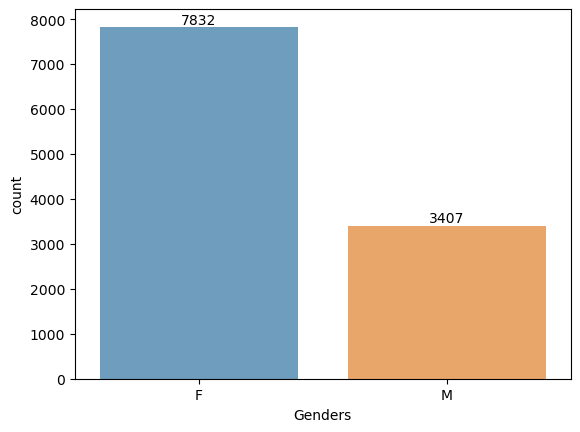

In [21]:
ax = sns.countplot(x = 'Gender', data = raw_df, alpha = 0.7)

for bars in ax.containers:
    ax.bar_label(bars)

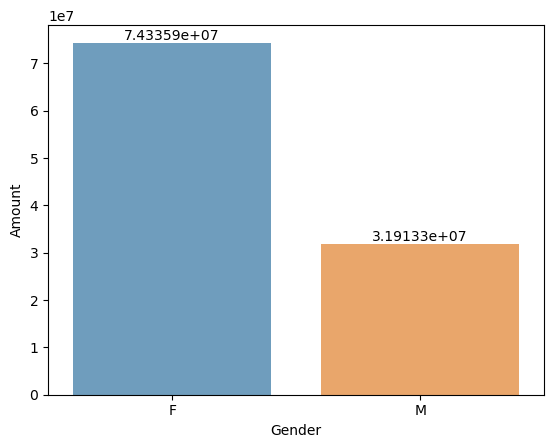

In [39]:
# Let's see genderwise sales
sales_gender = raw_df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)

ax = sns.barplot(data = sales_gender, x = 'Gender', y = 'Amount', alpha = 0.7)

for bars in ax.containers:
    ax.bar_label(bars)

Observation: Most buyers are females with higher purchasing power compared to males.

#### Age

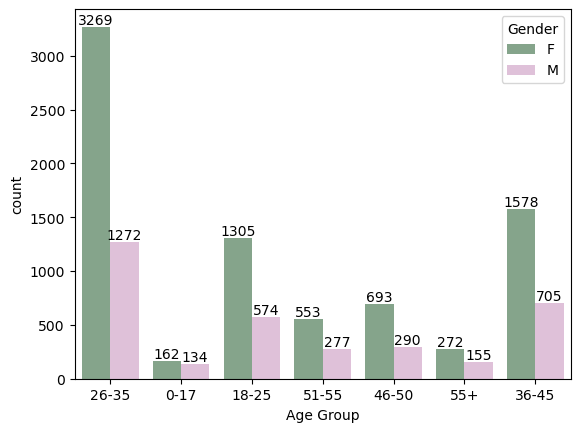

In [46]:
ax = sns.countplot(data = raw_df, x = 'Age Group', alpha = 0.6, hue = 'Gender', palette='cubehelix')

for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 1.0, 'Comparision of Sales Amount by Age Group')

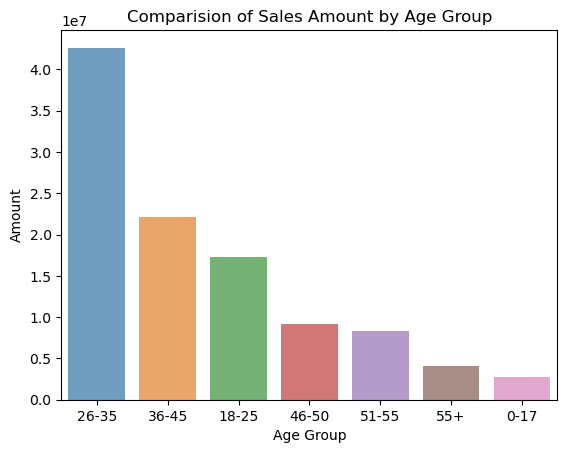

In [52]:
sales_age_grp = raw_df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

ax = sns.barplot(data = sales_age_grp, x = 'Age Group', y = 'Amount', alpha = 0.7)
plt.title('Comparision of Sales Amount by Age Group')


Observation: Clearly, maximum customers are aged between 26 and 35 followed by 36-45. This roughly falls within one standard deviation of the mean age of about 35 years. More women than men as buyers in all age groups. This follows their spending capacity as well.

### State

<Axes: xlabel='State', ylabel='Amount'>

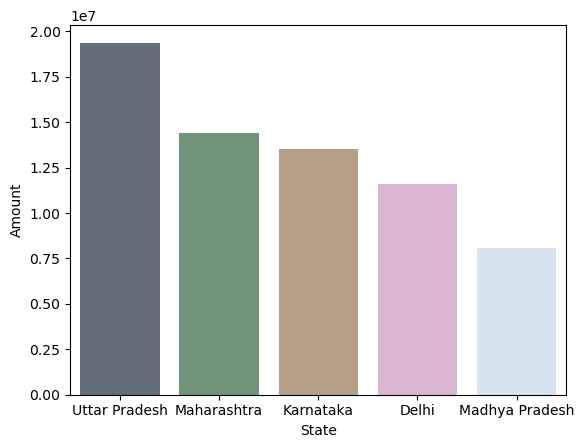

In [57]:
# Top 5 States by sales amount
sales_state = raw_df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = 0).head(5)

sns.barplot(data = sales_state, x = 'State', y = 'Amount', alpha = 0.7, palette='cubehelix')

<Axes: xlabel='State', ylabel='Orders'>

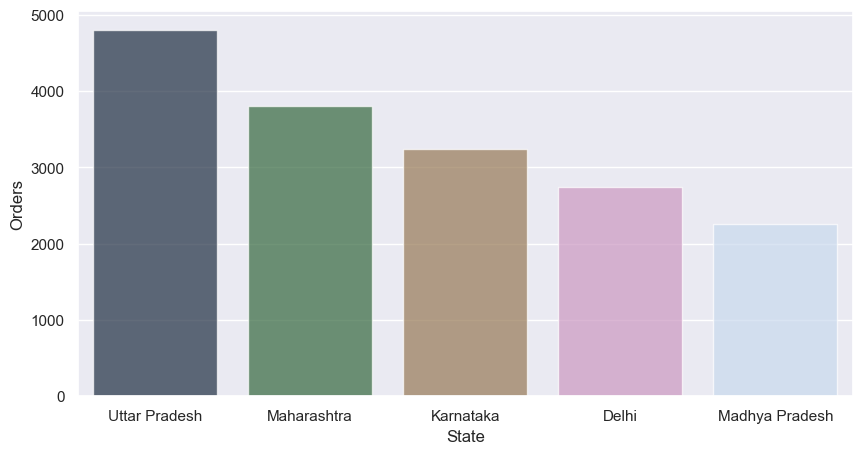

In [64]:
# Top 5 States by order count
sales_state = raw_df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by = 'Orders', ascending = 0).head(5)

sns.set(rc = {'figure.figsize':(10,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Orders', alpha = 0.7, palette='cubehelix')


Observation: Maximum orders and amount spent on orders are from states Uttar Pradesh, Maharashtra and Karnataka respectively.

### Marital Status

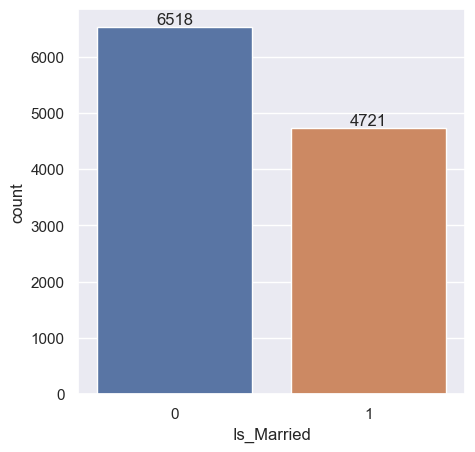

In [70]:
sns.set(rc = {'figure.figsize':(5,5)})
ax = sns.countplot(data = raw_df, x = 'Is_Married')

for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 1.0, 'Comparison of Sales amount by Marital Status and Gender')

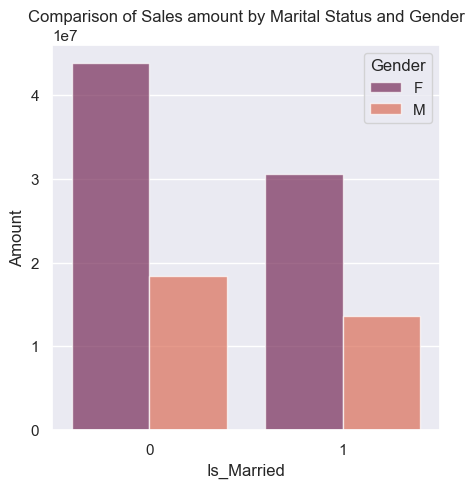

In [82]:
#Comparing Sales amount with gender and marital status
sales_gen_is_married = raw_df.groupby(['Gender','Is_Married'], as_index=False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)

sns.barplot(data = sales_gen_is_married, x = 'Is_Married', y = 'Amount', hue = 'Gender', alpha = 0.7,palette='rocket')
plt.title('Comparison of Sales amount by Marital Status and Gender')

Observation: Most of the buyers are unmarried women. They have high purchasing power.

### Occupation

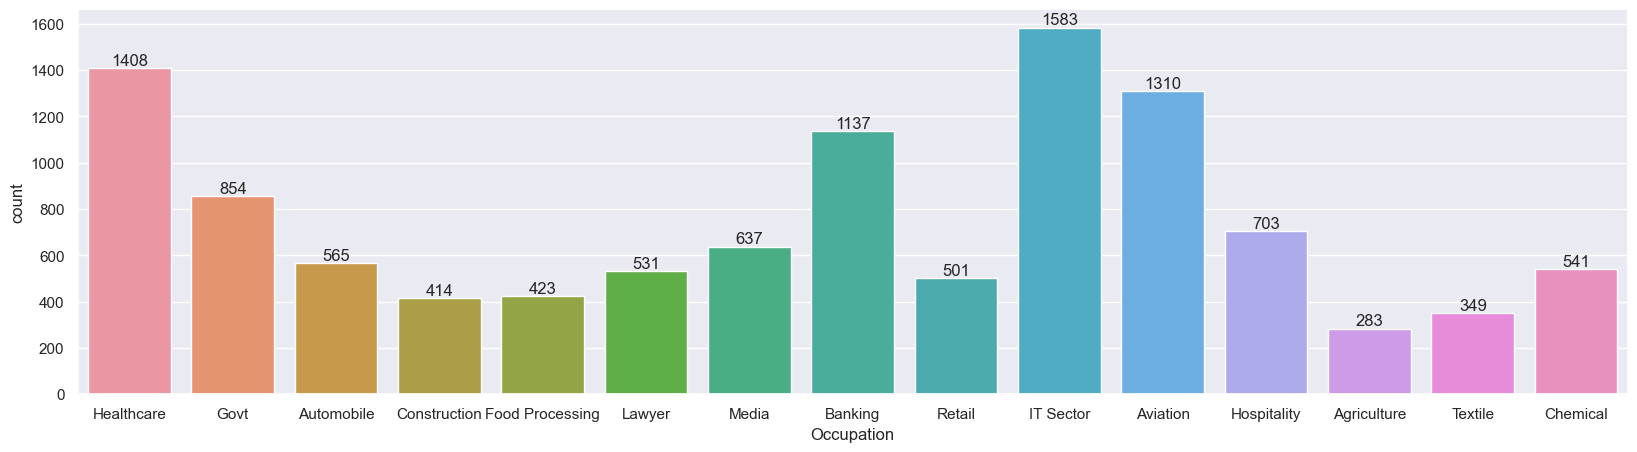

In [85]:
sns.set(rc = {'figure.figsize':(20,5)})
ax = sns.countplot(data = raw_df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

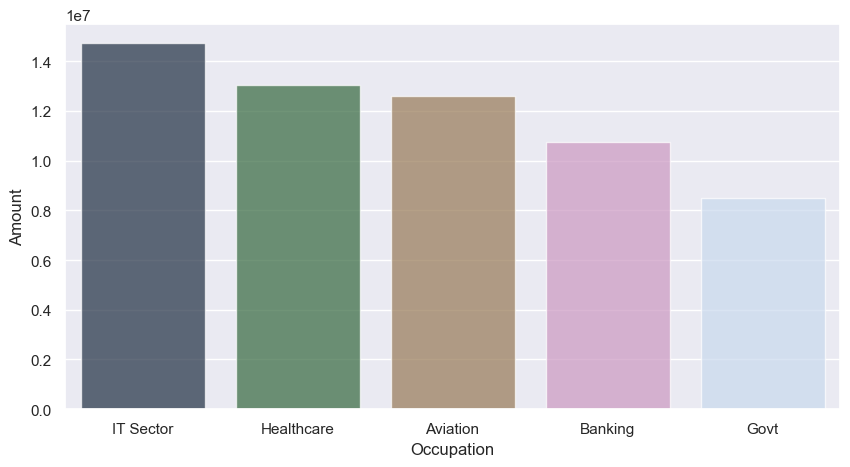

In [87]:
# Top 5 States by order count
sales_occupation = raw_df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = 0).head(5)

sns.set(rc = {'figure.figsize':(10,5)})
sns.barplot(data = sales_occupation, x = 'Occupation', y = 'Amount', alpha = 0.7, palette='cubehelix')


Observation: Most buyers are from IT sector, followed by Healthcare and Aviation sectors.

### Product Category

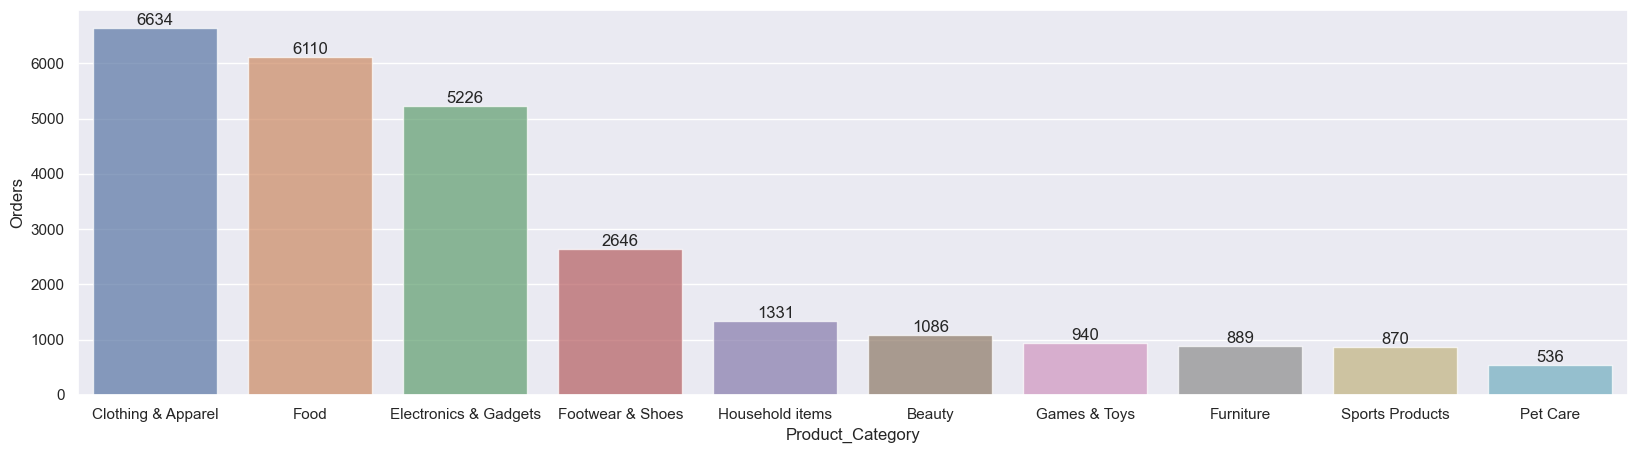

In [94]:
# Top 10 products by order count

count_prod_cat = raw_df.groupby(['Product_Category'], as_index=False)['Orders'].sum().sort_values(by = 'Orders', ascending= False).head(10)

sns.set(rc = {'figure.figsize':(20,5)})

ax = sns.barplot(data = count_prod_cat, x = 'Product_Category', y = 'Orders', alpha = 0.7)

for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 1.0, 'Share of top selling product categories in Sales Amount')

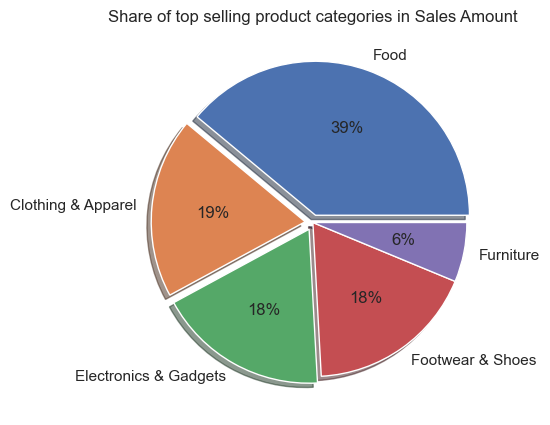

In [105]:
prod_cat_amount = raw_df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(5)


plt.pie(data = prod_cat_amount, x = 'Amount',labels='Product_Category', autopct='%.0f%%', explode = (0.05,0.05,0.05,0,0), shadow = True)

plt.title('Share of top selling product categories in Sales Amount')

Observation: People place maximum orders for clothing items followed by food. But they spend significantly more on food followed by clothing.

On a higher level, people like to buy and spend most in Food, followed by Clothing and Electronics respectively.

### Conclusions and Insights

1. Married women in the age group 26-35 years from UP, Maharashtra and Karnataka working in the IT, Healthcare and Aviation sectors are the biggest spenders. They have a preference for Food, Clothing and Electronics category products.

2. While maximum orders are from clothing category, maximum sales revenue is generated by Food category. Perhaps, food on average is more expensive than clothes.